# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Number_of_cities = len(cities)
Number_of_cities

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [65]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
#for city in cities:   

#weather_api_key= "a160fd00bbc7c7caddb54e2757ff85b2"
#city_ejempo=['London','Melbourne','Alaska','Jazan','Caracas','Harare','El Junquito','New Orleans',"GTY77","Maracay","Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in cities[:10]:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Number.append(Req_weather_city['id'])
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of {Number_of_cities} |City number: {Req_weather_city['id']}, City name: {Req_weather_city['name']}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "Wind Speed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


Processing Record 1 of 613 |City number: 4944903, City name: Nantucket
Processing Record 2 of 613 |City number: 86049, City name: Jalu
Processing Record 3 of 613 |City number: 986717, City name: Kruisfontein
Processing Record 4 of 613 |City number: 6185377, City name: Yellowknife
Processing Record 5 of 613 |City number: 4030556, City name: Rikitea
Processing Record 6 of 613 |City number: 1734798, City name: Semenyih
Processing Record 7 of 613 |City number: 6201424, City name: Mataura
Processing Record 8 of 613 |City number: 3833367, City name: Ushuaia
Processing Record 9 of 613 |City number: 2020591, City name: Magdagachi
Processing Record 10 of 613 |City number: 4017152, City name: Benjamín Hill


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [66]:
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nantucket,41.2835,-70.0995,42.89,56,1,23.02,US,02/06/2021
1,Jalu,29.0331,21.5482,63.28,35,0,8.52,LY,02/06/2021
2,Kruisfontein,-34.0033,24.7314,68.00,86,0,3.00,ZA,02/06/2021
3,Yellowknife,62.4560,-114.3525,-37.70,67,1,3.44,CA,02/06/2021
4,Rikitea,-23.1203,-134.9692,77.72,73,100,11.63,PF,02/06/2021
5,Semenyih,2.9516,101.8430,79.14,69,20,8.05,MY,02/06/2021
6,Mataura,-46.1927,168.8643,52.38,90,5,1.79,NZ,02/06/2021
7,Ushuaia,-54.8000,-68.3000,55.40,67,20,21.85,AR,02/06/2021
8,Magdagachi,53.4500,125.8000,-19.03,84,0,3.94,RU,02/06/2021
9,Benjamín Hill,30.1667,-111.1000,72.50,17,0,4.00,MX,02/06/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [67]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000
mean,6.122460,-5.603430,45.458000,64.400000,14.70000,8.924000
std,43.045683,109.893883,40.769891,23.085349,31.03063,7.740056
min,-54.800000,-134.969200,-37.700000,17.000000,0.00000,1.790000
25%,-31.282550,-100.849875,45.262500,58.750000,0.00000,3.565000
50%,15.992350,-23.375900,59.340000,68.000000,1.00000,6.025000
75%,38.504300,82.565100,71.375000,81.250000,16.25000,10.852500
max,62.456000,168.864300,79.140000,90.000000,100.00000,23.020000


In [68]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] > 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] > 100)]
if len(city_Hum100) == 0:
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] < 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [69]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nantucket,41.2835,-70.0995,42.89,56,1,23.02,US,02/06/2021
1,Jalu,29.0331,21.5482,63.28,35,0,8.52,LY,02/06/2021
2,Kruisfontein,-34.0033,24.7314,68.00,86,0,3.00,ZA,02/06/2021
3,Yellowknife,62.4560,-114.3525,-37.70,67,1,3.44,CA,02/06/2021
4,Rikitea,-23.1203,-134.9692,77.72,73,100,11.63,PF,02/06/2021
5,Semenyih,2.9516,101.8430,79.14,69,20,8.05,MY,02/06/2021
6,Mataura,-46.1927,168.8643,52.38,90,5,1.79,NZ,02/06/2021
7,Ushuaia,-54.8000,-68.3000,55.40,67,20,21.85,AR,02/06/2021
8,Magdagachi,53.4500,125.8000,-19.03,84,0,3.94,RU,02/06/2021
9,Benjamín Hill,30.1667,-111.1000,72.50,17,0,4.00,MX,02/06/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

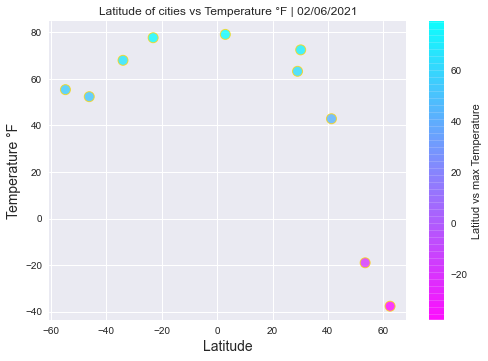

In [74]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
ratio = clean_city_data['Temp'] #[1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 1.28, 1.09, 1.02]
plt.scatter(x, y, s=100, c=ratio, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Temperature °F", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs max Temperature')


## Latitude vs. Humidity Plot

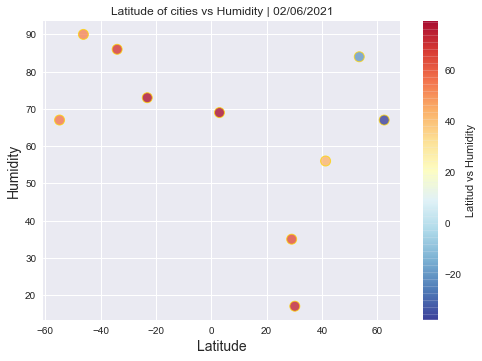

In [76]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
plt.scatter(x, y, s=100, c=ratio, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Humidity | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Humidity", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Humidity')

## Latitude vs. Cloudiness Plot

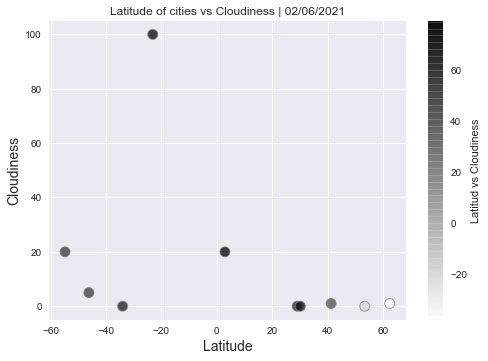

In [77]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
plt.scatter(x, y, s=100, c=ratio, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Cloudiness | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Cloudiness", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Cloudiness')

## Latitude vs. Wind Speed Plot

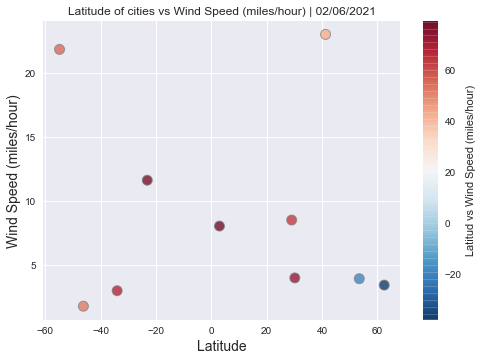

In [80]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
plt.scatter(x, y, s=100, c=ratio, cmap="RdBu_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Wind Speed (miles/hour)", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs Wind Speed (miles/hour)')


## Linear Regression

In [81]:
#Latitude Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"the intercept :{round(intercept,2)}");
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Lat linear regression model :{line_eq}");
#plt.scatter(X,Y, s=100, c="#000023", alpha=0.9, linewidths=1, edgecolors="black", sizes=sizes, cmap="viridis")
#plt.plot(x,regress_values,"r-");


the intercept :9.08
Lat linear regression model :y = -0.03x + 9.08


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

ValueError: 'c' argument has 6 elements, which is inconsistent with 'x' and 'y' with size 4.

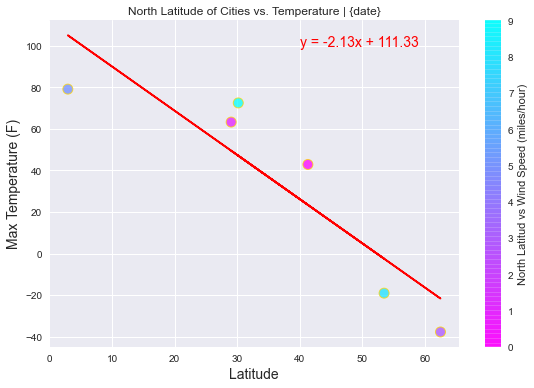

In [91]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
# Southern Hemisphere = Latitude between 0 ° and -90 °: Southern Hemisphere
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
date = Northern_city_data['Date'].max()
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Temp']
ratio_Northern = Northern_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,2)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(40,100),fontsize=14, color="red")
plt.title("North Latitude of Cities vs. Temperature | {date}", fontsize = "12")
plt.xlabel("Latitude", size=14)
plt.ylabel("Max Temperature (F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Wind Speed (miles/hour)')

#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Temp']
ratio_Southern = Southern_city_data['Temp'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_Sout)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values,"r-")
#plt.annotate(line_north,(20,100),fontsize=14, color="red")
plt.title("South Latitude of Cities vs. Temperature | {date}", fontsize = "12")
plt.xlabel("Latitude", size=14)
plt.ylabel("Max Temperature (F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Wind Speed (miles/hour)')


plt.show();

#print(f"Lat linear regression model :{line_north}");
#plt.style.use('seaborn')
#plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75)
#plt.plot(x_north,regress_values,"r-")
#plt.title(f"Latitude of Cities vs. Temperature | {date}", fontsize = "12")
#plt.xlabel(f"Latitude", fontsize="14")
#plt.ylabel(f"Max Temperature (F)", fontsize="14")
#cbar= plt.colorbar()
#cbar.set_label('Latitud vs max Temperature')

#plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression